In [27]:
from datetime import date, timedelta
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [5]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [12]:
sbux = repo.historical_daily('SBUX', start=start, end=end)

In [13]:
df.head()

,SPY,AAPL
date,,
2020-09-22,NaN,NaN
2020-09-23,-0.034756,-0.049586
2020-09-24,0.039077,0.006645
2020-09-25,-0.024018,0.017395
2020-09-28,0.034900,0.010434


In [14]:
sbux = returns(sbux)

In [20]:
values = sbux['log_return'].astype(float).dropna().to_numpy().reshape(-1, 1)

In [21]:
model = GaussianMixture(n_components=2)
model.fit(values)

GaussianMixture(n_components=2)

In [23]:
weights = model.weights_
means = model.means_
cov = model.covariances_

print("weights: {0}".format(weights))
print("means: {0}".format(means))
print("variances: {0}".format(cov))

weights: [0.37915508 0.62084492]
means: [[ 0.02153984]
 [-0.01123071]]
variances: [[[0.00028042]]

 [[0.00034137]]]


In [24]:
means = means.flatten()
var = cov.flatten()

In [28]:
x_list = np.linspace(values.min(), values.max(), 100)
fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

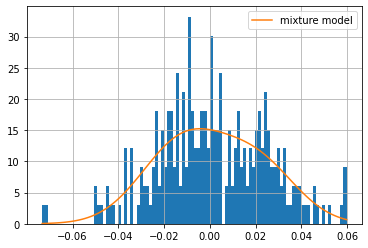

In [29]:
sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend();